# Création DataFrame avec les données de Mendeley

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Création des dataframes d'image brute

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import Isomap
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from matplotlib.image import imread
from matplotlib import offsetbox
%matplotlib inline
import seaborn as sns

import os
import cv2

from PIL import Image

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/basophil"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                  #  print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_bas = pd.DataFrame(data.reshape(data.shape[0], -1))

df_bas['code']='BA'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_100102.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_101381.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_101611.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_102039.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_102750.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_10387.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_

Processed image 65: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_157951.jpg
Processed image 66: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_1581.jpg
Processed image 67: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_158249.jpg
Processed image 68: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_158647.jpg
Processed image 69: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_161101.jpg
Processed image 70: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_161905.jpg
Processed image 71: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelon

Processed image 147: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_221009.jpg
Processed image 148: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_221057.jpg
Processed image 149: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_221648.jpg
Processed image 150: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_22197.jpg
Processed image 151: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_223010.jpg
Processed image 152: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_223705.jpg
Processed image 153: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 208: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_267693.jpg
Processed image 209: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_268064.jpg
Processed image 210: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_27002.jpg
Processed image 211: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_270382.jpg
Processed image 212: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_270647.jpg
Processed image 213: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_271501.jpg
Processed image 214: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 267: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_309434.jpg
Processed image 268: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_309583.jpg
Processed image 269: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_310106.jpg
Processed image 270: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_312613.jpg
Processed image 271: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_31317.jpg
Processed image 272: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_313484.jpg
Processed image 273: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 329: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_35708.jpg
Processed image 330: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_357319.jpg
Processed image 331: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_35803.jpg
Processed image 332: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_35932.jpg
Processed image 333: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_359743.jpg
Processed image 334: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_35991.jpg
Processed image 335: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Bar

Processed image 387: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_395695.jpg
Processed image 388: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_396170.jpg
Processed image 389: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_396430.jpg
Processed image 390: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_396998.jpg
Processed image 391: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_397187.jpg
Processed image 392: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_397684.jpg
Processed image 393: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 455: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_438004.jpg
Processed image 456: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_438781.jpg
Processed image 457: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_439718.jpg
Processed image 458: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_441957.jpg
Processed image 459: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_442012.jpg
Processed image 460: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_442038.jpg
Processed image 461: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 514: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_481299.jpg
Processed image 515: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_481414.jpg
Processed image 516: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_482919.jpg
Processed image 517: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_482920.jpg
Processed image 518: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_484151.jpg
Processed image 519: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_484450.jpg
Processed image 520: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 598: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_537842.jpg
Processed image 599: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_538389.jpg
Processed image 600: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_540646.jpg
Processed image 601: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_544516.jpg
Processed image 602: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_544558.jpg
Processed image 603: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_545194.jpg
Processed image 604: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 655: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_58212.jpg
Processed image 656: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_582405.jpg
Processed image 657: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_582752.jpg
Processed image 658: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_583166.jpg
Processed image 659: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_583260.jpg
Processed image 660: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_583432.jpg
Processed image 661: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 710: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_618537.jpg
Processed image 711: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_619254.jpg
Processed image 712: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_620858.jpg
Processed image 713: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_622087.jpg
Processed image 714: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_624477.jpg
Processed image 715: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_625394.jpg
Processed image 716: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 778: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_674430.jpg
Processed image 779: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_674593.jpg
Processed image 780: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_675444.jpg
Processed image 781: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_676044.jpg
Processed image 782: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_677090.jpg
Processed image 783: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_677937.jpg
Processed image 784: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 848: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_726726.jpg
Processed image 849: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_727435.jpg
Processed image 850: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_727528.jpg
Processed image 851: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_727591.jpg
Processed image 852: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_728520.jpg
Processed image 853: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_729979.jpg
Processed image 854: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 917: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_783348.jpg
Processed image 918: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_783821.jpg
Processed image 919: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_785211.jpg
Processed image 920: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_785583.jpg
Processed image 921: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_785668.jpg
Processed image 922: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_78609.jpg
Processed image 923: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 983: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_824897.jpg
Processed image 984: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_825338.jpg
Processed image 985: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_825699.jpg
Processed image 986: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_827021.jpg
Processed image 987: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_827257.jpg
Processed image 988: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_827462.jpg
Processed image 989: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 1051: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_875399.jpg
Processed image 1052: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_875554.jpg
Processed image 1053: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_87690.jpg
Processed image 1054: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_877555.jpg
Processed image 1055: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_878109.jpg
Processed image 1056: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_878312.jpg
Processed image 1057: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendele

Processed image 1119: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_922284.jpg
Processed image 1120: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_922772.jpg
Processed image 1121: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_92330.jpg
Processed image 1122: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_925384.jpg
Processed image 1123: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_925938.jpg
Processed image 1124: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_926393.jpg
Processed image 1125: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendele

Processed image 1188: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_98152.jpg
Processed image 1189: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_981874.jpg
Processed image 1190: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_982393.jpg
Processed image 1191: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_982740.jpg
Processed image 1192: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_985011.jpg
Processed image 1193: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/basophil\BA_985054.jpg
Processed image 1194: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendele

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/eosinophil"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                   # print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_eo = pd.DataFrame(data.reshape(data.shape[0], -1))

df_eo['code']='EO'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_100213.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_1007.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_100884.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_10150.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_101772.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_101852.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barc

Processed image 64: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_118894.jpg
Processed image 65: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_118939.jpg
Processed image 66: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_119318.jpg
Processed image 67: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_119559.jpg
Processed image 68: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_119662.jpg
Processed image 69: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_119952.jpg
Processed image 70: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley

Processed image 127: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_141524.jpg
Processed image 128: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_141807.jpg
Processed image 129: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_142429.jpg
Processed image 130: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_142659.jpg
Processed image 131: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_142899.jpg
Processed image 132: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_143764.jpg
Processed image 133: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 189: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_161474.jpg
Processed image 190: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_161514.jpg
Processed image 191: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_161563.jpg
Processed image 192: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_161656.jpg
Processed image 193: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_161989.jpg
Processed image 194: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_162015.jpg
Processed image 195: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 249: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_175921.jpg
Processed image 250: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_175923.jpg
Processed image 251: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_176538.jpg
Processed image 252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_176988.jpg
Processed image 253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_177724.jpg
Processed image 254: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_177975.jpg
Processed image 255: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 311: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_198519.jpg
Processed image 312: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_198556.jpg
Processed image 313: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_198602.jpg
Processed image 314: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_198665.jpg
Processed image 315: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_199314.jpg
Processed image 316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_199651.jpg
Processed image 317: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 371: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_218066.jpg
Processed image 372: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_218071.jpg
Processed image 373: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_218478.jpg
Processed image 374: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_218533.jpg
Processed image 375: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_218637.jpg
Processed image 376: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_219068.jpg
Processed image 377: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 433: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_23194.jpg
Processed image 434: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_232464.jpg
Processed image 435: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_232945.jpg
Processed image 436: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_232961.jpg
Processed image 437: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_233225.jpg
Processed image 438: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_233482.jpg
Processed image 439: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 501: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_248889.jpg
Processed image 502: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_248919.jpg
Processed image 503: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_249066.jpg
Processed image 504: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_249533.jpg
Processed image 505: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_249877.jpg
Processed image 506: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_250252.jpg
Processed image 507: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 570: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_268868.jpg
Processed image 571: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_268984.jpg
Processed image 572: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_269091.jpg
Processed image 573: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_269312.jpg
Processed image 574: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_269763.jpg
Processed image 575: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_27.jpg
Processed image 576: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mende

Processed image 636: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_285354.jpg
Processed image 637: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_285640.jpg
Processed image 638: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_286161.jpg
Processed image 639: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_286184.jpg
Processed image 640: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_286409.jpg
Processed image 641: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_287394.jpg
Processed image 642: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 703: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_307124.jpg
Processed image 704: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_307413.jpg
Processed image 705: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_307912.jpg
Processed image 706: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_308825.jpg
Processed image 707: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_309157.jpg
Processed image 708: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_309479.jpg
Processed image 709: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 772: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_326543.jpg
Processed image 773: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_326816.jpg
Processed image 774: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_326829.jpg
Processed image 775: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_32702.jpg
Processed image 776: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_327236.jpg
Processed image 777: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_327676.jpg
Processed image 778: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 840: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_345534.jpg
Processed image 841: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_345969.jpg
Processed image 842: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_346443.jpg
Processed image 843: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_346565.jpg
Processed image 844: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_346820.jpg
Processed image 845: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_347529.jpg
Processed image 846: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 909: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_365446.jpg
Processed image 910: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_365533.jpg
Processed image 911: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_365929.jpg
Processed image 912: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_366118.jpg
Processed image 913: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_366351.jpg
Processed image 914: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_366584.jpg
Processed image 915: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 976: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_384138.jpg
Processed image 977: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_384158.jpg
Processed image 978: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_384169.jpg
Processed image 979: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_386301.jpg
Processed image 980: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_386448.jpg
Processed image 981: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_386747.jpg
Processed image 982: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 1044: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_407207.jpg
Processed image 1045: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_40758.jpg
Processed image 1046: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_408607.jpg
Processed image 1047: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_408710.jpg
Processed image 1048: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_409320.jpg
Processed image 1049: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_409717.jpg
Processed image 1050: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1113: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_428208.jpg
Processed image 1114: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_428275.jpg
Processed image 1115: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_428861.jpg
Processed image 1116: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_429010.jpg
Processed image 1117: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_429018.jpg
Processed image 1118: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_429509.jpg
Processed image 1119: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1181: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_448998.jpg
Processed image 1182: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_449091.jpg
Processed image 1183: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_449240.jpg
Processed image 1184: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_449362.jpg
Processed image 1185: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_449710.jpg
Processed image 1186: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_449753.jpg
Processed image 1187: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1249: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_465089.jpg
Processed image 1250: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_466494.jpg
Processed image 1251: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_466655.jpg
Processed image 1252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_466882.jpg
Processed image 1253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_466996.jpg
Processed image 1254: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_467442.jpg
Processed image 1255: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1315: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_484252.jpg
Processed image 1316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_484601.jpg
Processed image 1317: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_48474.jpg
Processed image 1318: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_484849.jpg
Processed image 1319: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_484926.jpg
Processed image 1320: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_485156.jpg
Processed image 1321: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1384: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_496972.jpg
Processed image 1385: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_497408.jpg
Processed image 1386: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_498178.jpg
Processed image 1387: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_498223.jpg
Processed image 1388: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_49826.jpg
Processed image 1389: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_498358.jpg
Processed image 1390: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1453: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_516632.jpg
Processed image 1454: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_516640.jpg
Processed image 1455: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_516662.jpg
Processed image 1456: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_517855.jpg
Processed image 1457: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_518015.jpg
Processed image 1458: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_51829.jpg
Processed image 1459: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1523: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_535165.jpg
Processed image 1524: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_535432.jpg
Processed image 1525: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_535577.jpg
Processed image 1526: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_536245.jpg
Processed image 1527: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_536327.jpg
Processed image 1528: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_5364.jpg
Processed image 1529: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 1590: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_553112.jpg
Processed image 1591: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_553205.jpg
Processed image 1592: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_553315.jpg
Processed image 1593: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_553328.jpg
Processed image 1594: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_553474.jpg
Processed image 1595: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_553758.jpg
Processed image 1596: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1657: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_573632.jpg
Processed image 1658: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_574803.jpg
Processed image 1659: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_574965.jpg
Processed image 1660: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_575404.jpg
Processed image 1661: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_575434.jpg
Processed image 1662: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_575793.jpg
Processed image 1663: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1726: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_593837.jpg
Processed image 1727: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_594333.jpg
Processed image 1728: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_594721.jpg
Processed image 1729: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_594816.jpg
Processed image 1730: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_595397.jpg
Processed image 1731: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_596214.jpg
Processed image 1732: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1797: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_614304.jpg
Processed image 1798: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_614405.jpg
Processed image 1799: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_614883.jpg
Processed image 1800: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_615294.jpg
Processed image 1801: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_615464.jpg
Processed image 1802: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_615642.jpg
Processed image 1803: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1865: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_634772.jpg
Processed image 1866: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_634809.jpg
Processed image 1867: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_635751.jpg
Processed image 1868: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_63600.jpg
Processed image 1869: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_636396.jpg
Processed image 1870: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_636677.jpg
Processed image 1871: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1932: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_652542.jpg
Processed image 1933: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_652701.jpg
Processed image 1934: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_65339.jpg
Processed image 1935: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_655132.jpg
Processed image 1936: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_655234.jpg
Processed image 1937: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_655398.jpg
Processed image 1938: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1994: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_671068.jpg
Processed image 1995: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_671075.jpg
Processed image 1996: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_671354.jpg
Processed image 1997: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_671358.jpg
Processed image 1998: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_671419.jpg
Processed image 1999: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_673106.jpg
Processed image 2000: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 2057: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_690304.jpg
Processed image 2058: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_690577.jpg
Processed image 2059: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_690608.jpg
Processed image 2060: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_690628.jpg
Processed image 2061: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_690811.jpg
Processed image 2062: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_691055.jpg
Processed image 2063: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 2120: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_707092.jpg
Processed image 2121: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_707166.jpg
Processed image 2122: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_707277.jpg
Processed image 2123: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_708.jpg
Processed image 2124: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_708332.jpg
Processed image 2125: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_708456.jpg
Processed image 2126: C:/Users/Planade/Documents/Datascientest/Projet Blood Cel

Processed image 2186: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_727395.jpg
Processed image 2187: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_72747.jpg
Processed image 2188: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_72758.jpg
Processed image 2189: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_727803.jpg
Processed image 2190: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_728093.jpg
Processed image 2191: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_728292.jpg
Processed image 2192: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 2252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_743865.jpg
Processed image 2253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_74387.jpg
Processed image 2254: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_74399.jpg
Processed image 2255: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_744068.jpg
Processed image 2256: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_744173.jpg
Processed image 2257: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_744195.jpg
Processed image 2258: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 2312: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_762558.jpg
Processed image 2313: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_76269.jpg
Processed image 2314: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_762845.jpg
Processed image 2315: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_76374.jpg
Processed image 2316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_76399.jpg
Processed image 2317: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_76411.jpg
Processed image 2318: C:/Users/Planade/Documents/Datascientest/Projet Blood Cell

Processed image 2376: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_782734.jpg
Processed image 2377: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_782907.jpg
Processed image 2378: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_783064.jpg
Processed image 2379: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_78307.jpg
Processed image 2380: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_783136.jpg
Processed image 2381: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_783793.jpg
Processed image 2382: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 2435: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_797630.jpg
Processed image 2436: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_798593.jpg
Processed image 2437: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_799276.jpg
Processed image 2438: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_799659.jpg
Processed image 2439: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_800065.jpg
Processed image 2440: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_800344.jpg
Processed image 2441: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 2499: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_816399.jpg
Processed image 2500: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_816467.jpg
Processed image 2501: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_817196.jpg
Processed image 2502: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_817876.jpg
Processed image 2503: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_818276.jpg
Processed image 2504: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_818751.jpg
Processed image 2505: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 2562: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_835288.jpg
Processed image 2563: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_835312.jpg
Processed image 2564: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_835323.jpg
Processed image 2565: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_835338.jpg
Processed image 2566: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_83547.jpg
Processed image 2567: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_836401.jpg
Processed image 2568: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 2628: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_852834.jpg
Processed image 2629: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_852904.jpg
Processed image 2630: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_853158.jpg
Processed image 2631: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_8539.jpg
Processed image 2632: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_853914.jpg
Processed image 2633: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_854168.jpg
Processed image 2634: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 2695: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_872715.jpg
Processed image 2696: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_872946.jpg
Processed image 2697: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_872983.jpg
Processed image 2698: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_873032.jpg
Processed image 2699: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_873315.jpg
Processed image 2700: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_873756.jpg
Processed image 2701: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 2761: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_900162.jpg
Processed image 2762: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_900549.jpg
Processed image 2763: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_90077.jpg
Processed image 2764: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_901002.jpg
Processed image 2765: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_901011.jpg
Processed image 2766: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_901206.jpg
Processed image 2767: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 2826: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_913562.jpg
Processed image 2827: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_913784.jpg
Processed image 2828: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_914393.jpg
Processed image 2829: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_914908.jpg
Processed image 2830: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_915293.jpg
Processed image 2831: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_915734.jpg
Processed image 2832: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 2889: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_934148.jpg
Processed image 2890: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_93417.jpg
Processed image 2891: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_934992.jpg
Processed image 2892: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_935629.jpg
Processed image 2893: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_936331.jpg
Processed image 2894: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_936658.jpg
Processed image 2895: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 2951: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_952156.jpg
Processed image 2952: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_952316.jpg
Processed image 2953: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_952649.jpg
Processed image 2954: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_953295.jpg
Processed image 2955: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_953561.jpg
Processed image 2956: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_954031.jpg
Processed image 2957: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 3018: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_971082.jpg
Processed image 3019: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_97141.jpg
Processed image 3020: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_971412.jpg
Processed image 3021: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_971641.jpg
Processed image 3022: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_971689.jpg
Processed image 3023: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_972000.jpg
Processed image 3024: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 3088: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_992960.jpg
Processed image 3089: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_993513.jpg
Processed image 3090: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_993601.jpg
Processed image 3091: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_993669.jpg
Processed image 3092: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_99390.jpg
Processed image 3093: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/eosinophil\EO_994040.jpg
Processed image 3094: C:/Users/Planade/Documents/Datascientest/Projet Blood C

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/erythroblast"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_ery = pd.DataFrame(data.reshape(data.shape[0], -1))

df_ery['code']='ER'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_101031.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_101277.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_10157.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_101704.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_101733.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_102372.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cell

Processed image 71: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_139698.jpg
Processed image 72: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_141392.jpg
Processed image 73: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_141589.jpg
Processed image 74: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_141835.jpg
Processed image 75: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_142439.jpg
Processed image 76: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_142718.jpg
Processed image 77: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 138: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_180168.jpg
Processed image 139: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_180571.jpg
Processed image 140: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_180615.jpg
Processed image 141: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_181233.jpg
Processed image 142: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_181249.jpg
Processed image 143: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_181408.jpg
Processed image 144: C:/Users/Planade/Documents/Datascientest/Pr

Processed image 209: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_217339.jpg
Processed image 210: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_21736.jpg
Processed image 211: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_217606.jpg
Processed image 212: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_218522.jpg
Processed image 213: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_219791.jpg
Processed image 214: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_22055.jpg
Processed image 215: C:/Users/Planade/Documents/Datascientest/Proj

Processed image 281: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_257829.jpg
Processed image 282: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_258850.jpg
Processed image 283: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_258900.jpg
Processed image 284: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_259317.jpg
Processed image 285: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_260331.jpg
Processed image 286: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_260693.jpg
Processed image 287: C:/Users/Planade/Documents/Datascientest/Pr

Processed image 353: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_298993.jpg
Processed image 354: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_300288.jpg
Processed image 355: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_300293.jpg
Processed image 356: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_300685.jpg
Processed image 357: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_302099.jpg
Processed image 358: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_302657.jpg
Processed image 359: C:/Users/Planade/Documents/Datascientest/Pr

Processed image 420: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_342437.jpg
Processed image 421: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_34345.jpg
Processed image 422: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_344388.jpg
Processed image 423: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_344608.jpg
Processed image 424: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_345085.jpg
Processed image 425: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_346109.jpg
Processed image 426: C:/Users/Planade/Documents/Datascientest/Pro

Processed image 491: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_384659.jpg
Processed image 492: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_384697.jpg
Processed image 493: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_384966.jpg
Processed image 494: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_385246.jpg
Processed image 495: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_386111.jpg
Processed image 496: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_386139.jpg
Processed image 497: C:/Users/Planade/Documents/Datascientest/Pr

Processed image 547: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_422942.jpg
Processed image 548: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_423056.jpg
Processed image 549: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_42309.jpg
Processed image 550: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_423273.jpg
Processed image 551: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_423288.jpg
Processed image 552: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_423428.jpg
Processed image 553: C:/Users/Planade/Documents/Datascientest/Pro

Processed image 620: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_456209.jpg
Processed image 621: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_45655.jpg
Processed image 622: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_456967.jpg
Processed image 623: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_456982.jpg
Processed image 624: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_459626.jpg
Processed image 625: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_460282.jpg
Processed image 626: C:/Users/Planade/Documents/Datascientest/Pro

Processed image 691: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_502957.jpg
Processed image 692: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_503196.jpg
Processed image 693: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_50359.jpg
Processed image 694: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_504354.jpg
Processed image 695: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_505595.jpg
Processed image 696: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_50575.jpg
Processed image 697: C:/Users/Planade/Documents/Datascientest/Proj

Processed image 763: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_5435.jpg
Processed image 764: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_5436.jpg
Processed image 765: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_545731.jpg
Processed image 766: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_546173.jpg
Processed image 767: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_546850.jpg
Processed image 768: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_54691.jpg
Processed image 769: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 827: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_586845.jpg
Processed image 828: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_587105.jpg
Processed image 829: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_587357.jpg
Processed image 830: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_587463.jpg
Processed image 831: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_587643.jpg
Processed image 832: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_587815.jpg
Processed image 833: C:/Users/Planade/Documents/Datascientest/Pr

Processed image 887: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_623960.jpg
Processed image 888: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_624420.jpg
Processed image 889: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_62462.jpg
Processed image 890: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_625327.jpg
Processed image 891: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_625631.jpg
Processed image 892: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_626298.jpg
Processed image 893: C:/Users/Planade/Documents/Datascientest/Pro

Processed image 943: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_656395.jpg
Processed image 944: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_656496.jpg
Processed image 945: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_65796.jpg
Processed image 946: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_658445.jpg
Processed image 947: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_65895.jpg
Processed image 948: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_659150.jpg
Processed image 949: C:/Users/Planade/Documents/Datascientest/Proj

Processed image 1003: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_685726.jpg
Processed image 1004: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_686342.jpg
Processed image 1005: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_686500.jpg
Processed image 1006: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_686677.jpg
Processed image 1007: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_687354.jpg
Processed image 1008: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_688898.jpg
Processed image 1009: C:/Users/Planade/Documents/Datascien

Processed image 1069: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_721235.jpg
Processed image 1070: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_721782.jpg
Processed image 1071: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_721826.jpg
Processed image 1072: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_723032.jpg
Processed image 1073: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_723913.jpg
Processed image 1074: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_72526.jpg
Processed image 1075: C:/Users/Planade/Documents/Datascient

Processed image 1130: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_761895.jpg
Processed image 1131: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_761961.jpg
Processed image 1132: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_762130.jpg
Processed image 1133: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_762169.jpg
Processed image 1134: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_763339.jpg
Processed image 1135: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_763350.jpg
Processed image 1136: C:/Users/Planade/Documents/Datascien

Processed image 1195: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_795834.jpg
Processed image 1196: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_796370.jpg
Processed image 1197: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_797029.jpg
Processed image 1198: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_797906.jpg
Processed image 1199: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_801120.jpg
Processed image 1200: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_80122.jpg
Processed image 1201: C:/Users/Planade/Documents/Datascient

Processed image 1252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_836603.jpg
Processed image 1253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_837003.jpg
Processed image 1254: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_83761.jpg
Processed image 1255: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_837626.jpg
Processed image 1256: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_838174.jpg
Processed image 1257: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_838195.jpg
Processed image 1258: C:/Users/Planade/Documents/Datascient

Processed image 1316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_871040.jpg
Processed image 1317: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_871063.jpg
Processed image 1318: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_87123.jpg
Processed image 1319: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_872365.jpg
Processed image 1320: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_872380.jpg
Processed image 1321: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_872425.jpg
Processed image 1322: C:/Users/Planade/Documents/Datascient

Processed image 1376: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_8990.jpg
Processed image 1377: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_899646.jpg
Processed image 1378: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_899878.jpg
Processed image 1379: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_900319.jpg
Processed image 1380: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_90040.jpg
Processed image 1381: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_901635.jpg
Processed image 1382: C:/Users/Planade/Documents/Datascientes

Processed image 1439: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_934384.jpg
Processed image 1440: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_935386.jpg
Processed image 1441: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_935950.jpg
Processed image 1442: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_936261.jpg
Processed image 1443: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_936823.jpg
Processed image 1444: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_937614.jpg
Processed image 1445: C:/Users/Planade/Documents/Datascien

Processed image 1500: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_969454.jpg
Processed image 1501: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_969523.jpg
Processed image 1502: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_970306.jpg
Processed image 1503: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_97139.jpg
Processed image 1504: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_972205.jpg
Processed image 1505: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/erythroblast\ERB_972534.jpg
Processed image 1506: C:/Users/Planade/Documents/Datascient

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/ig"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_ig = pd.DataFrame(data.reshape(data.shape[0], -1))

df_ig['code']='IG'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_101958.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_102433.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_110946.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_111589.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_115116.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_119514.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_132866.jpg

Processed image 62: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_514852.jpg
Processed image 63: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_534154.jpg
Processed image 64: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_539360.jpg
Processed image 65: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_545112.jpg
Processed image 66: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_562106.jpg
Processed image 67: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_565427.jpg
Processed image 68: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_566

Processed image 143: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_957559.jpg
Processed image 144: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_965044.jpg
Processed image 145: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_966787.jpg
Processed image 146: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_970372.jpg
Processed image 147: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_976246.jpg
Processed image 148: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\IG_980904.jpg
Processed image 149: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig

Processed image 201: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_143275.jpg
Processed image 202: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_143892.jpg
Processed image 203: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_144883.jpg
Processed image 204: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_145204.jpg
Processed image 205: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_146142.jpg
Processed image 206: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_147081.jpg
Processed image 207: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 261: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_198575.jpg
Processed image 262: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_199021.jpg
Processed image 263: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_19975.jpg
Processed image 264: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_200817.jpg
Processed image 265: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_201220.jpg
Processed image 266: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_202423.jpg
Processed image 267: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 320: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_244121.jpg
Processed image 321: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_244224.jpg
Processed image 322: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_244619.jpg
Processed image 323: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_245549.jpg
Processed image 324: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_245632.jpg
Processed image 325: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_245815.jpg
Processed image 326: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 390: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_293959.jpg
Processed image 391: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_295393.jpg
Processed image 392: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_29561.jpg
Processed image 393: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_295743.jpg
Processed image 394: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_29576.jpg
Processed image 395: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_295950.jpg
Processed image 396: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DI

Processed image 456: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_342596.jpg
Processed image 457: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_344807.jpg
Processed image 458: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_345736.jpg
Processed image 459: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_346115.jpg
Processed image 460: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_346275.jpg
Processed image 461: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_346332.jpg
Processed image 462: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 524: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_39970.jpg
Processed image 525: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_399802.jpg
Processed image 526: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_400392.jpg
Processed image 527: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_400491.jpg
Processed image 528: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_400904.jpg
Processed image 529: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_401038.jpg
Processed image 530: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 585: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_450209.jpg
Processed image 586: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_451221.jpg
Processed image 587: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_451570.jpg
Processed image 588: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_452599.jpg
Processed image 589: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_456339.jpg
Processed image 590: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_457259.jpg
Processed image 591: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 651: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_514496.jpg
Processed image 652: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_515058.jpg
Processed image 653: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_516316.jpg
Processed image 654: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_516686.jpg
Processed image 655: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_517905.jpg
Processed image 656: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_523094.jpg
Processed image 657: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 719: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_58781.jpg
Processed image 720: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_589252.jpg
Processed image 721: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_59134.jpg
Processed image 722: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_59156.jpg
Processed image 723: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_591946.jpg
Processed image 724: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_592368.jpg
Processed image 725: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB

Processed image 788: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_653818.jpg
Processed image 789: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_654116.jpg
Processed image 790: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_656575.jpg
Processed image 791: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_656824.jpg
Processed image 792: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_658445.jpg
Processed image 793: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_658487.jpg
Processed image 794: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 855: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_719838.jpg
Processed image 856: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_720207.jpg
Processed image 857: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_721640.jpg
Processed image 858: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_723163.jpg
Processed image 859: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_723798.jpg
Processed image 860: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_723979.jpg
Processed image 861: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 921: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_772687.jpg
Processed image 922: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_77389.jpg
Processed image 923: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_773939.jpg
Processed image 924: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_775343.jpg
Processed image 925: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_777961.jpg
Processed image 926: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_779035.jpg
Processed image 927: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 988: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_828326.jpg
Processed image 989: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_828384.jpg
Processed image 990: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_829523.jpg
Processed image 991: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_829920.jpg
Processed image 992: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_830457.jpg
Processed image 993: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_83088.jpg
Processed image 994: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 1057: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_89515.jpg
Processed image 1058: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_895440.jpg
Processed image 1059: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_896503.jpg
Processed image 1060: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_897369.jpg
Processed image 1061: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_897835.jpg
Processed image 1062: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_898617.jpg
Processed image 1063: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_n

Processed image 1123: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_961606.jpg
Processed image 1124: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_964504.jpg
Processed image 1125: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_9660.jpg
Processed image 1126: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_96735.jpg
Processed image 1127: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_967908.jpg
Processed image 1128: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MMY_96795.jpg
Processed image 1129: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_norm

Processed image 1192: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_121211.jpg
Processed image 1193: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_122208.jpg
Processed image 1194: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_12301.jpg
Processed image 1195: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_124515.jpg
Processed image 1196: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_125978.jpg
Processed image 1197: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_126278.jpg
Processed image 1198: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 1263: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_181873.jpg
Processed image 1264: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_182553.jpg
Processed image 1265: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_182600.jpg
Processed image 1266: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_182811.jpg
Processed image 1267: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_184763.jpg
Processed image 1268: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_184990.jpg
Processed image 1269: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal

Processed image 1320: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_222884.jpg
Processed image 1321: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_222988.jpg
Processed image 1322: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_223749.jpg
Processed image 1323: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_225007.jpg
Processed image 1324: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_22578.jpg
Processed image 1325: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_225980.jpg
Processed image 1326: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 1380: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_285737.jpg
Processed image 1381: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_286014.jpg
Processed image 1382: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_286474.jpg
Processed image 1383: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_286698.jpg
Processed image 1384: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_286730.jpg
Processed image 1385: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_288231.jpg
Processed image 1386: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal

Processed image 1438: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_324260.jpg
Processed image 1439: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_32518.jpg
Processed image 1440: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_325489.jpg
Processed image 1441: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_326196.jpg
Processed image 1442: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_32784.jpg
Processed image 1443: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_328953.jpg
Processed image 1444: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 1514: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_383620.jpg
Processed image 1515: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_384587.jpg
Processed image 1516: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_384910.jpg
Processed image 1517: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_384984.jpg
Processed image 1518: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_386684.jpg
Processed image 1519: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_38787.jpg
Processed image 1520: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 1585: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_438326.jpg
Processed image 1586: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_438704.jpg
Processed image 1587: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_439142.jpg
Processed image 1588: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_441275.jpg
Processed image 1589: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_44187.jpg
Processed image 1590: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_442608.jpg
Processed image 1591: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 1655: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_501416.jpg
Processed image 1656: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_501558.jpg
Processed image 1657: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_50402.jpg
Processed image 1658: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_504047.jpg
Processed image 1659: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_50428.jpg
Processed image 1660: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_5047.jpg
Processed image 1661: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB

Processed image 1724: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_56207.jpg
Processed image 1725: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_562076.jpg
Processed image 1726: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_56227.jpg
Processed image 1727: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_562532.jpg
Processed image 1728: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_563352.jpg
Processed image 1729: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_564217.jpg
Processed image 1730: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 1795: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_607445.jpg
Processed image 1796: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_608101.jpg
Processed image 1797: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_609024.jpg
Processed image 1798: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_609553.jpg
Processed image 1799: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_609980.jpg
Processed image 1800: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_610612.jpg
Processed image 1801: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal

Processed image 1868: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_674036.jpg
Processed image 1869: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_67602.jpg
Processed image 1870: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_676267.jpg
Processed image 1871: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_676552.jpg
Processed image 1872: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_677034.jpg
Processed image 1873: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_677420.jpg
Processed image 1874: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 1942: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_73334.jpg
Processed image 1943: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_733557.jpg
Processed image 1944: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_73498.jpg
Processed image 1945: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_737751.jpg
Processed image 1946: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_738483.jpg
Processed image 1947: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_738913.jpg
Processed image 1948: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_D

Processed image 2017: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_79413.jpg
Processed image 2018: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_794526.jpg
Processed image 2019: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_796199.jpg
Processed image 2020: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_796308.jpg
Processed image 2021: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_797564.jpg
Processed image 2022: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_797938.jpg
Processed image 2023: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_

Processed image 2089: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_839682.jpg
Processed image 2090: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_839774.jpg
Processed image 2091: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_840673.jpg
Processed image 2092: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_841903.jpg
Processed image 2093: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_842106.jpg
Processed image 2094: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_842784.jpg
Processed image 2095: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal

Processed image 2160: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_893307.jpg
Processed image 2161: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_893731.jpg
Processed image 2162: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_894949.jpg
Processed image 2163: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_895269.jpg
Processed image 2164: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_89581.jpg
Processed image 2165: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_8959.jpg
Processed image 2166: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DI

Processed image 2232: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_950557.jpg
Processed image 2233: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_950610.jpg
Processed image 2234: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_951641.jpg
Processed image 2235: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_951663.jpg
Processed image 2236: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_951985.jpg
Processed image 2237: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_952273.jpg
Processed image 2238: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal

Processed image 2303: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\MY_998617.jpg
Processed image 2304: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_103033.jpg
Processed image 2305: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_10323.jpg
Processed image 2306: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_10344.jpg
Processed image 2307: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_104042.jpg
Processed image 2308: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_106315.jpg
Processed image 2309: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_nor

Processed image 2373: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_220816.jpg
Processed image 2374: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_221441.jpg
Processed image 2375: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_225787.jpg
Processed image 2376: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_227142.jpg
Processed image 2377: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_228031.jpg
Processed image 2378: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_230129.jpg
Processed image 2379: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_

Processed image 2443: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_326172.jpg
Processed image 2444: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_327563.jpg
Processed image 2445: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_327730.jpg
Processed image 2446: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_327868.jpg
Processed image 2447: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_328769.jpg
Processed image 2448: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_330168.jpg
Processed image 2449: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_

Processed image 2513: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_44436.jpg
Processed image 2514: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_44483.jpg
Processed image 2515: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_445168.jpg
Processed image 2516: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_445946.jpg
Processed image 2517: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_446733.jpg
Processed image 2518: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_447067.jpg
Processed image 2519: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_no

Processed image 2583: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_51963.jpg
Processed image 2584: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_519748.jpg
Processed image 2585: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_520542.jpg
Processed image 2586: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_521964.jpg
Processed image 2587: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_525476.jpg
Processed image 2588: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_525765.jpg
Processed image 2589: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_n

Processed image 2641: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_609517.jpg
Processed image 2642: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_609818.jpg
Processed image 2643: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_610548.jpg
Processed image 2644: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_614413.jpg
Processed image 2645: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_614431.jpg
Processed image 2646: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_616509.jpg
Processed image 2647: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_

Processed image 2697: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_695850.jpg
Processed image 2698: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_699159.jpg
Processed image 2699: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_702550.jpg
Processed image 2700: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_703530.jpg
Processed image 2701: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_705579.jpg
Processed image 2702: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_70574.jpg
Processed image 2703: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_n

Processed image 2765: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_804781.jpg
Processed image 2766: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_805423.jpg
Processed image 2767: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_806069.jpg
Processed image 2768: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_80773.jpg
Processed image 2769: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_80820.jpg
Processed image 2770: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_809845.jpg
Processed image 2771: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_no

Processed image 2827: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_889992.jpg
Processed image 2828: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_89006.jpg
Processed image 2829: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_891982.jpg
Processed image 2830: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_894120.jpg
Processed image 2831: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_895103.jpg
Processed image 2832: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_898032.jpg
Processed image 2833: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_n

Processed image 2884: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_977800.jpg
Processed image 2885: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_980502.jpg
Processed image 2886: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_982613.jpg
Processed image 2887: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_984217.jpg
Processed image 2888: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_985577.jpg
Processed image 2889: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/ig\PMY_985586.jpg
Processed image 2890: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/lymphocyte"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_lym = pd.DataFrame(data.reshape(data.shape[0], -1))

df_lym['code'] ='LYM'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_100275.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_102859.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_10361.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_104129.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_104155.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_105283.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Ba

Processed image 65: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_155590.jpg
Processed image 66: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_156281.jpg
Processed image 67: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_157670.jpg
Processed image 68: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_158006.jpg
Processed image 69: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_158602.jpg
Processed image 70: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_159509.jpg
Processed image 71: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley

Processed image 120: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_190035.jpg
Processed image 121: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_191979.jpg
Processed image 122: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_192261.jpg
Processed image 123: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_192703.jpg
Processed image 124: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_192796.jpg
Processed image 125: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_193211.jpg
Processed image 126: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 178: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_246286.jpg
Processed image 179: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_247228.jpg
Processed image 180: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_247915.jpg
Processed image 181: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_249136.jpg
Processed image 182: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_249223.jpg
Processed image 183: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_249379.jpg
Processed image 184: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 243: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_291851.jpg
Processed image 244: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_29236.jpg
Processed image 245: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_29343.jpg
Processed image 246: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_294207.jpg
Processed image 247: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_294248.jpg
Processed image 248: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_294345.jpg
Processed image 249: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Men

Processed image 310: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_335429.jpg
Processed image 311: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_338197.jpg
Processed image 312: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_339629.jpg
Processed image 313: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_34151.jpg
Processed image 314: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_341627.jpg
Processed image 315: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_342034.jpg
Processed image 316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 376: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_382149.jpg
Processed image 377: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_384251.jpg
Processed image 378: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_384608.jpg
Processed image 379: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_38503.jpg
Processed image 380: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_386792.jpg
Processed image 381: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_38716.jpg
Processed image 382: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Men

Processed image 446: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_440047.jpg
Processed image 447: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_441727.jpg
Processed image 448: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_442238.jpg
Processed image 449: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_442263.jpg
Processed image 450: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_442318.jpg
Processed image 451: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_44395.jpg
Processed image 452: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 514: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_495207.jpg
Processed image 515: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_495804.jpg
Processed image 516: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_497395.jpg
Processed image 517: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_499539.jpg
Processed image 518: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_500097.jpg
Processed image 519: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_500326.jpg
Processed image 520: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 580: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_550491.jpg
Processed image 581: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_551814.jpg
Processed image 582: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_551920.jpg
Processed image 583: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_553290.jpg
Processed image 584: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_553581.jpg
Processed image 585: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_553626.jpg
Processed image 586: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 645: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_598957.jpg
Processed image 646: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_599020.jpg
Processed image 647: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_599099.jpg
Processed image 648: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_599428.jpg
Processed image 649: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_60004.jpg
Processed image 650: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_600174.jpg
Processed image 651: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 715: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_649255.jpg
Processed image 716: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_649814.jpg
Processed image 717: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_65073.jpg
Processed image 718: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_650769.jpg
Processed image 719: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_650850.jpg
Processed image 720: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_651080.jpg
Processed image 721: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 785: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_69669.jpg
Processed image 786: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_696961.jpg
Processed image 787: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_699056.jpg
Processed image 788: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_700199.jpg
Processed image 789: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_700280.jpg
Processed image 790: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_700507.jpg
Processed image 791: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 857: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_744710.jpg
Processed image 858: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_7449.jpg
Processed image 859: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_744979.jpg
Processed image 860: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_744989.jpg
Processed image 861: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_745113.jpg
Processed image 862: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_745253.jpg
Processed image 863: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Men

Processed image 911: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_785284.jpg
Processed image 912: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_785608.jpg
Processed image 913: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_786317.jpg
Processed image 914: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_787227.jpg
Processed image 915: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_787687.jpg
Processed image 916: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_788039.jpg
Processed image 917: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/M

Processed image 968: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_82173.jpg
Processed image 969: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_82338.jpg
Processed image 970: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_823713.jpg
Processed image 971: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_824813.jpg
Processed image 972: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_825373.jpg
Processed image 973: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_825410.jpg
Processed image 974: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Men

Processed image 1023: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_858672.jpg
Processed image 1024: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_860635.jpg
Processed image 1025: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_86114.jpg
Processed image 1026: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_861218.jpg
Processed image 1027: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_86171.jpg
Processed image 1028: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_861914.jpg
Processed image 1029: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 1080: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_894569.jpg
Processed image 1081: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_894763.jpg
Processed image 1082: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_894865.jpg
Processed image 1083: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_896867.jpg
Processed image 1084: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_897158.jpg
Processed image 1085: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_897525.jpg
Processed image 1086: C:/Users/Planade/Documents/Datascientest/Projet Blood 

Processed image 1143: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_935379.jpg
Processed image 1144: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_936131.jpg
Processed image 1145: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_937401.jpg
Processed image 1146: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_938330.jpg
Processed image 1147: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_93903.jpg
Processed image 1148: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_939287.jpg
Processed image 1149: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 1209: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_995949.jpg
Processed image 1210: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_996704.jpg
Processed image 1211: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_99706.jpg
Processed image 1212: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_997935.jpg
Processed image 1213: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_998918.jpg
Processed image 1214: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/lymphocyte\LY_999045.jpg


In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/monocyte"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                   # print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_mon = pd.DataFrame(data.reshape(data.shape[0], -1))

df_mon['code']='MON'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_100695.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_101258.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_102400.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_103089.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_103756.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_104290.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC

Processed image 63: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_137267.jpg
Processed image 64: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_139615.jpg
Processed image 65: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_139617.jpg
Processed image 66: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_139718.jpg
Processed image 67: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_140180.jpg
Processed image 68: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_140886.jpg
Processed image 69: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcel

Processed image 124: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_174318.jpg
Processed image 125: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_174547.jpg
Processed image 126: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_176021.jpg
Processed image 127: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_177234.jpg
Processed image 128: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_179303.jpg
Processed image 129: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_179950.jpg
Processed image 130: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 189: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_216299.jpg
Processed image 190: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_216533.jpg
Processed image 191: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_216731.jpg
Processed image 192: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_217158.jpg
Processed image 193: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_217246.jpg
Processed image 194: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_217315.jpg
Processed image 195: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 257: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_256430.jpg
Processed image 258: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_257525.jpg
Processed image 259: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_257537.jpg
Processed image 260: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_257939.jpg
Processed image 261: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_258001.jpg
Processed image 262: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_258162.jpg
Processed image 263: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 324: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_299307.jpg
Processed image 325: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_29936.jpg
Processed image 326: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_300733.jpg
Processed image 327: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_300921.jpg
Processed image 328: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_301812.jpg
Processed image 329: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_302654.jpg
Processed image 330: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 392: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_348749.jpg
Processed image 393: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_349852.jpg
Processed image 394: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_349949.jpg
Processed image 395: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_350301.jpg
Processed image 396: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_351284.jpg
Processed image 397: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_352633.jpg
Processed image 398: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 461: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_38254.jpg
Processed image 462: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_382707.jpg
Processed image 463: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_382804.jpg
Processed image 464: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_383141.jpg
Processed image 465: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_384012.jpg
Processed image 466: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_385020.jpg
Processed image 467: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 530: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_423983.jpg
Processed image 531: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_424310.jpg
Processed image 532: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_424389.jpg
Processed image 533: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_425760.jpg
Processed image 534: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_427035.jpg
Processed image 535: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_429133.jpg
Processed image 536: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 599: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_470658.jpg
Processed image 600: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_473875.jpg
Processed image 601: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_474241.jpg
Processed image 602: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_474380.jpg
Processed image 603: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_475504.jpg
Processed image 604: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_475798.jpg
Processed image 605: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 667: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_512783.jpg
Processed image 668: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_513345.jpg
Processed image 669: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_516178.jpg
Processed image 670: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_516349.jpg
Processed image 671: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_516376.jpg
Processed image 672: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_51728.jpg
Processed image 673: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 738: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_559563.jpg
Processed image 739: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_560006.jpg
Processed image 740: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_560988.jpg
Processed image 741: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_562773.jpg
Processed image 742: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_562918.jpg
Processed image 743: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_563214.jpg
Processed image 744: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 807: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_611239.jpg
Processed image 808: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_611333.jpg
Processed image 809: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_612179.jpg
Processed image 810: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_61220.jpg
Processed image 811: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_612867.jpg
Processed image 812: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_613573.jpg
Processed image 813: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 872: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_649902.jpg
Processed image 873: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_649989.jpg
Processed image 874: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_650709.jpg
Processed image 875: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_65093.jpg
Processed image 876: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_652110.jpg
Processed image 877: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_652800.jpg
Processed image 878: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_

Processed image 942: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_693426.jpg
Processed image 943: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_693501.jpg
Processed image 944: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_696431.jpg
Processed image 945: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_696522.jpg
Processed image 946: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_698675.jpg
Processed image 947: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_699279.jpg
Processed image 948: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data

Processed image 1010: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_742036.jpg
Processed image 1011: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_744511.jpg
Processed image 1012: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_745075.jpg
Processed image 1013: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_745328.jpg
Processed image 1014: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_745330.jpg
Processed image 1015: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_745810.jpg
Processed image 1016: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendel

Processed image 1079: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_776848.jpg
Processed image 1080: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_777403.jpg
Processed image 1081: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_777817.jpg
Processed image 1082: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_778100.jpg
Processed image 1083: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_778332.jpg
Processed image 1084: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_778543.jpg
Processed image 1085: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendel

Processed image 1150: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_820730.jpg
Processed image 1151: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_820929.jpg
Processed image 1152: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_821329.jpg
Processed image 1153: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_821957.jpg
Processed image 1154: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_822158.jpg
Processed image 1155: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_823715.jpg
Processed image 1156: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendel

Processed image 1220: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_861803.jpg
Processed image 1221: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_864818.jpg
Processed image 1222: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_864830.jpg
Processed image 1223: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_865229.jpg
Processed image 1224: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_865250.jpg
Processed image 1225: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_866348.jpg
Processed image 1226: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendel

Processed image 1289: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_905340.jpg
Processed image 1290: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_9059.jpg
Processed image 1291: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_906340.jpg
Processed image 1292: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_906623.jpg
Processed image 1293: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_907363.jpg
Processed image 1294: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_90755.jpg
Processed image 1295: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_

Processed image 1358: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_952489.jpg
Processed image 1359: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_952558.jpg
Processed image 1360: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_952579.jpg
Processed image 1361: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_952670.jpg
Processed image 1362: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_956778.jpg
Processed image 1363: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/monocyte\MO_95719.jpg
Processed image 1364: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendele

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/neutrophil"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_neu = pd.DataFrame(data.reshape(data.shape[0], -1))

df_neu['code']='SNE'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_100878.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_101007.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_101082.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_101234.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_102129.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_102203.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_

Processed image 72: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_137691.jpg
Processed image 73: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_138667.jpg
Processed image 74: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_139528.jpg
Processed image 75: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_139893.jpg
Processed image 76: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_139958.jpg
Processed image 77: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_140522.jpg
Processed image 78: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Me

Processed image 141: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_175712.jpg
Processed image 142: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_175829.jpg
Processed image 143: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_178593.jpg
Processed image 144: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_179854.jpg
Processed image 145: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_179915.jpg
Processed image 146: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_179976.jpg
Processed image 147: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 206: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_211063.jpg
Processed image 207: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_21130.jpg
Processed image 208: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_211504.jpg
Processed image 209: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_212149.jpg
Processed image 210: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_212334.jpg
Processed image 211: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_212416.jpg
Processed image 212: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 270: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_248619.jpg
Processed image 271: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_248704.jpg
Processed image 272: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_248881.jpg
Processed image 273: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_249469.jpg
Processed image 274: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_2506.jpg
Processed image 275: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_252057.jpg
Processed image 276: C:/Users/Planade/Documents/Datascientest/Projet Blood Cel

Processed image 335: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_279176.jpg
Processed image 336: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_279206.jpg
Processed image 337: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_279578.jpg
Processed image 338: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_280282.jpg
Processed image 339: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_280912.jpg
Processed image 340: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_2810.jpg
Processed image 341: C:/Users/Planade/Documents/Datascientest/Projet Blood Cel

Processed image 396: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_309023.jpg
Processed image 397: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_309082.jpg
Processed image 398: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_309263.jpg
Processed image 399: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_309326.jpg
Processed image 400: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_309792.jpg
Processed image 401: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_30987.jpg
Processed image 402: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 461: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_340751.jpg
Processed image 462: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_341487.jpg
Processed image 463: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_341561.jpg
Processed image 464: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_341589.jpg
Processed image 465: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_341802.jpg
Processed image 466: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_342062.jpg
Processed image 467: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 521: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_366650.jpg
Processed image 522: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_366749.jpg
Processed image 523: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_366885.jpg
Processed image 524: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_367351.jpg
Processed image 525: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_367547.jpg
Processed image 526: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_368574.jpg
Processed image 527: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 583: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_390232.jpg
Processed image 584: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_390698.jpg
Processed image 585: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_39101.jpg
Processed image 586: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_391140.jpg
Processed image 587: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_392730.jpg
Processed image 588: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_393818.jpg
Processed image 589: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 646: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_430604.jpg
Processed image 647: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_431488.jpg
Processed image 648: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_432647.jpg
Processed image 649: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_433423.jpg
Processed image 650: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_434568.jpg
Processed image 651: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_435236.jpg
Processed image 652: C:/Users/Planade/Documents/Datascientest/Projet Blood C

Processed image 708: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_462949.jpg
Processed image 709: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_464149.jpg
Processed image 710: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_464803.jpg
Processed image 711: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_464962.jpg
Processed image 712: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_464974.jpg
Processed image 713: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_46642.jpg
Processed image 714: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 770: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_501437.jpg
Processed image 771: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_50191.jpg
Processed image 772: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_502039.jpg
Processed image 773: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_502095.jpg
Processed image 774: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_502987.jpg
Processed image 775: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_503739.jpg
Processed image 776: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 833: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_543730.jpg
Processed image 834: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_544250.jpg
Processed image 835: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_54463.jpg
Processed image 836: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_544854.jpg
Processed image 837: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_545123.jpg
Processed image 838: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_545407.jpg
Processed image 839: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 897: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_576989.jpg
Processed image 898: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_57734.jpg
Processed image 899: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_577568.jpg
Processed image 900: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_578285.jpg
Processed image 901: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_57860.jpg
Processed image 902: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_578714.jpg
Processed image 903: C:/Users/Planade/Documents/Datascientest/Projet Blood Cel

Processed image 957: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_600309.jpg
Processed image 958: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_60203.jpg
Processed image 959: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_602066.jpg
Processed image 960: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_602109.jpg
Processed image 961: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_602491.jpg
Processed image 962: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_603801.jpg
Processed image 963: C:/Users/Planade/Documents/Datascientest/Projet Blood Ce

Processed image 1019: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_640026.jpg
Processed image 1020: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_640067.jpg
Processed image 1021: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_640140.jpg
Processed image 1022: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_640458.jpg
Processed image 1023: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_640988.jpg
Processed image 1024: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_641093.jpg
Processed image 1025: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1080: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_674279.jpg
Processed image 1081: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_6747.jpg
Processed image 1082: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_676841.jpg
Processed image 1083: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_676979.jpg
Processed image 1084: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_677665.jpg
Processed image 1085: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_678750.jpg
Processed image 1086: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 1142: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_718921.jpg
Processed image 1143: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_719511.jpg
Processed image 1144: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_719678.jpg
Processed image 1145: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_720143.jpg
Processed image 1146: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_720265.jpg
Processed image 1147: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_721486.jpg
Processed image 1148: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1200: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_756237.jpg
Processed image 1201: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_757613.jpg
Processed image 1202: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_759017.jpg
Processed image 1203: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_759715.jpg
Processed image 1204: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_760262.jpg
Processed image 1205: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_760668.jpg
Processed image 1206: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1269: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_800374.jpg
Processed image 1270: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_80070.jpg
Processed image 1271: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_800976.jpg
Processed image 1272: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_801234.jpg
Processed image 1273: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_801236.jpg
Processed image 1274: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_801860.jpg
Processed image 1275: C:/Users/Planade/Documents/Datascientest/Projet B

Processed image 1339: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_839717.jpg
Processed image 1340: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_839791.jpg
Processed image 1341: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_840.jpg
Processed image 1342: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_840311.jpg
Processed image 1343: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_840660.jpg
Processed image 1344: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_840814.jpg
Processed image 1345: C:/Users/Planade/Documents/Datascientest/Projet Blo

Processed image 1408: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_878373.jpg
Processed image 1409: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_878990.jpg
Processed image 1410: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_879421.jpg
Processed image 1411: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_881009.jpg
Processed image 1412: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_882003.jpg
Processed image 1413: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_882512.jpg
Processed image 1414: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1479: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_918500.jpg
Processed image 1480: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_918862.jpg
Processed image 1481: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_918993.jpg
Processed image 1482: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_920389.jpg
Processed image 1483: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_921156.jpg
Processed image 1484: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_921626.jpg
Processed image 1485: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1551: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_956597.jpg
Processed image 1552: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_957531.jpg
Processed image 1553: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_958040.jpg
Processed image 1554: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_958533.jpg
Processed image 1555: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_958876.jpg
Processed image 1556: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_959253.jpg
Processed image 1557: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1621: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_991404.jpg
Processed image 1622: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_991489.jpg
Processed image 1623: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_991991.jpg
Processed image 1624: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_992020.jpg
Processed image 1625: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_992115.jpg
Processed image 1626: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\BNE_992159.jpg
Processed image 1627: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1691: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_10487.jpg
Processed image 1692: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_105096.jpg
Processed image 1693: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_10568.jpg
Processed image 1694: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_105867.jpg
Processed image 1695: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_106040.jpg
Processed image 1696: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_106989.jpg
Processed image 1697: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 1761: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_139017.jpg
Processed image 1762: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_139869.jpg
Processed image 1763: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_13989.jpg
Processed image 1764: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_14041.jpg
Processed image 1765: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_140435.jpg
Processed image 1766: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_140717.jpg
Processed image 1767: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 1828: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_169881.jpg
Processed image 1829: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_170589.jpg
Processed image 1830: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_171033.jpg
Processed image 1831: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_173457.jpg
Processed image 1832: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_173730.jpg
Processed image 1833: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_174050.jpg
Processed image 1834: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1899: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_205163.jpg
Processed image 1900: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_205547.jpg
Processed image 1901: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_206298.jpg
Processed image 1902: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_206523.jpg
Processed image 1903: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_206630.jpg
Processed image 1904: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_207129.jpg
Processed image 1905: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 1968: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_24126.jpg
Processed image 1969: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_241361.jpg
Processed image 1970: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_241620.jpg
Processed image 1971: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_24189.jpg
Processed image 1972: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_242266.jpg
Processed image 1973: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_242356.jpg
Processed image 1974: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 2039: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_280544.jpg
Processed image 2040: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_280927.jpg
Processed image 2041: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_281850.jpg
Processed image 2042: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_282692.jpg
Processed image 2043: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_285336.jpg
Processed image 2044: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_285625.jpg
Processed image 2045: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2106: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_326733.jpg
Processed image 2107: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_327603.jpg
Processed image 2108: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_328930.jpg
Processed image 2109: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_329838.jpg
Processed image 2110: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_330099.jpg
Processed image 2111: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_330213.jpg
Processed image 2112: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2177: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_366402.jpg
Processed image 2178: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_366990.jpg
Processed image 2179: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_367710.jpg
Processed image 2180: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_37089.jpg
Processed image 2181: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_371956.jpg
Processed image 2182: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_372018.jpg
Processed image 2183: C:/Users/Planade/Documents/Datascientest/Projet B

Processed image 2248: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_400193.jpg
Processed image 2249: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_400327.jpg
Processed image 2250: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_401003.jpg
Processed image 2251: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_401211.jpg
Processed image 2252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_401430.jpg
Processed image 2253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_401509.jpg
Processed image 2254: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2318: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_433684.jpg
Processed image 2319: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_433858.jpg
Processed image 2320: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_433963.jpg
Processed image 2321: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_434790.jpg
Processed image 2322: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_435561.jpg
Processed image 2323: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_438105.jpg
Processed image 2324: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2389: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_475360.jpg
Processed image 2390: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_475422.jpg
Processed image 2391: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_475803.jpg
Processed image 2392: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_476160.jpg
Processed image 2393: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_476747.jpg
Processed image 2394: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_477184.jpg
Processed image 2395: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2459: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_508088.jpg
Processed image 2460: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_508294.jpg
Processed image 2461: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_508392.jpg
Processed image 2462: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_508478.jpg
Processed image 2463: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_508710.jpg
Processed image 2464: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_509393.jpg
Processed image 2465: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2529: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_554543.jpg
Processed image 2530: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_555512.jpg
Processed image 2531: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_556448.jpg
Processed image 2532: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_556621.jpg
Processed image 2533: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_556796.jpg
Processed image 2534: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_556912.jpg
Processed image 2535: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2600: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_599793.jpg
Processed image 2601: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_599996.jpg
Processed image 2602: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_601004.jpg
Processed image 2603: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_60147.jpg
Processed image 2604: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_601504.jpg
Processed image 2605: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_602361.jpg
Processed image 2606: C:/Users/Planade/Documents/Datascientest/Projet B

Processed image 2668: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_633335.jpg
Processed image 2669: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_633532.jpg
Processed image 2670: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_634148.jpg
Processed image 2671: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_634877.jpg
Processed image 2672: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_635074.jpg
Processed image 2673: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_635288.jpg
Processed image 2674: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2738: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_674280.jpg
Processed image 2739: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_675028.jpg
Processed image 2740: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_676449.jpg
Processed image 2741: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_67724.jpg
Processed image 2742: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_677361.jpg
Processed image 2743: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_67811.jpg
Processed image 2744: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 2804: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_713759.jpg
Processed image 2805: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_714010.jpg
Processed image 2806: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_714788.jpg
Processed image 2807: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_714873.jpg
Processed image 2808: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_714876.jpg
Processed image 2809: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_715571.jpg
Processed image 2810: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2863: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_753880.jpg
Processed image 2864: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_754268.jpg
Processed image 2865: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_754575.jpg
Processed image 2866: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_755678.jpg
Processed image 2867: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_756026.jpg
Processed image 2868: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_756098.jpg
Processed image 2869: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 2926: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_79214.jpg
Processed image 2927: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_793789.jpg
Processed image 2928: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_794163.jpg
Processed image 2929: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_795630.jpg
Processed image 2930: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_796734.jpg
Processed image 2931: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_798289.jpg
Processed image 2932: C:/Users/Planade/Documents/Datascientest/Projet B

Processed image 2989: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_824674.jpg
Processed image 2990: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_82483.jpg
Processed image 2991: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_825561.jpg
Processed image 2992: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_826401.jpg
Processed image 2993: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_826772.jpg
Processed image 2994: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_827292.jpg
Processed image 2995: C:/Users/Planade/Documents/Datascientest/Projet B

Processed image 3054: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_859389.jpg
Processed image 3055: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_859885.jpg
Processed image 3056: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_860061.jpg
Processed image 3057: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_860190.jpg
Processed image 3058: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_860657.jpg
Processed image 3059: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_861933.jpg
Processed image 3060: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 3115: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_886540.jpg
Processed image 3116: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_886868.jpg
Processed image 3117: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_887894.jpg
Processed image 3118: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_888286.jpg
Processed image 3119: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_888384.jpg
Processed image 3120: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_888435.jpg
Processed image 3121: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 3176: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_911483.jpg
Processed image 3177: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_912151.jpg
Processed image 3178: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_912333.jpg
Processed image 3179: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_912820.jpg
Processed image 3180: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_912821.jpg
Processed image 3181: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_914583.jpg
Processed image 3182: C:/Users/Planade/Documents/Datascientest/Projet 

Processed image 3239: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_947090.jpg
Processed image 3240: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_94795.jpg
Processed image 3241: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_94859.jpg
Processed image 3242: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_948647.jpg
Processed image 3243: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_948962.jpg
Processed image 3244: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_951522.jpg
Processed image 3245: C:/Users/Planade/Documents/Datascientest/Projet Bl

Processed image 3300: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_979306.jpg
Processed image 3301: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_979904.jpg
Processed image 3302: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_980971.jpg
Processed image 3303: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_98176.jpg
Processed image 3304: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_981806.jpg
Processed image 3305: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/neutrophil\SNE_981851.jpg
Processed image 3306: C:/Users/Planade/Documents/Datascientest/Projet B

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/DataScientest_Blood_Cells_project/Mendeley_Data_Barcelona/platelet"
max_images = 50
depth = 3



images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                   # print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_pla = pd.DataFrame(data.reshape(data.shape[0], -1))

df_pla['code']='PLA'

Processed image 1: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_100161.jpg
Processed image 2: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_100529.jpg
Processed image 3: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_100790.jpg
Processed image 4: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_101132.jpg
Processed image 5: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_10233.jpg
Processed image 6: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_102535.jpg
Processed image 7: C:/Users/Planade/Documents/Datascientest/Projet Bloo

Processed image 63: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_122710.jpg
Processed image 64: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_122799.jpg
Processed image 65: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_122961.jpg
Processed image 66: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_12388.jpg
Processed image 67: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_124212.jpg
Processed image 68: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_124214.jpg
Processed image 69: C:/Users/Planade/Documents/Datascientest/Proj

Processed image 116: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_140323.jpg
Processed image 117: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_14035.jpg
Processed image 118: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_140524.jpg
Processed image 119: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_140656.jpg
Processed image 120: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_141072.jpg
Processed image 121: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_141137.jpg
Processed image 122: C:/Users/Planade/Documents/Datasciente

Processed image 182: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_169281.jpg
Processed image 183: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_169653.jpg
Processed image 184: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_169686.jpg
Processed image 185: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_169852.jpg
Processed image 186: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_169858.jpg
Processed image 187: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_170106.jpg
Processed image 188: C:/Users/Planade/Documents/Datascient

Processed image 248: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_192693.jpg
Processed image 249: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_193057.jpg
Processed image 250: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_19307.jpg
Processed image 251: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_193135.jpg
Processed image 252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_193513.jpg
Processed image 253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_193681.jpg
Processed image 254: C:/Users/Planade/Documents/Datasciente

Processed image 316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_215491.jpg
Processed image 317: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_215565.jpg
Processed image 318: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_215861.jpg
Processed image 319: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_216842.jpg
Processed image 320: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_217445.jpg
Processed image 321: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_21766.jpg
Processed image 322: C:/Users/Planade/Documents/Datasciente

Processed image 376: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_240431.jpg
Processed image 377: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_240502.jpg
Processed image 378: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_24104849.jpg
Processed image 379: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_24177.jpg
Processed image 380: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_242378.jpg
Processed image 381: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_242683.jpg
Processed image 382: C:/Users/Planade/Documents/Datascien

Processed image 440: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_266368.jpg
Processed image 441: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_266880.jpg
Processed image 442: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_267931.jpg
Processed image 443: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_268194.jpg
Processed image 444: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_268497.jpg
Processed image 445: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_26884.jpg
Processed image 446: C:/Users/Planade/Documents/Datasciente

Processed image 501: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_287348.jpg
Processed image 502: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_287352.jpg
Processed image 503: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_287486.jpg
Processed image 504: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_287780.jpg
Processed image 505: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_288792.jpg
Processed image 506: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_289998.jpg
Processed image 507: C:/Users/Planade/Documents/Datascient

Processed image 562: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_307806.jpg
Processed image 563: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_307856.jpg
Processed image 564: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_307929.jpg
Processed image 565: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_308160.jpg
Processed image 566: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_308317.jpg
Processed image 567: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_309114.jpg
Processed image 568: C:/Users/Planade/Documents/Datascient

Processed image 633: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_329696.jpg
Processed image 634: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_329789.jpg
Processed image 635: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_330342.jpg
Processed image 636: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_330541.jpg
Processed image 637: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_331885.jpg
Processed image 638: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_332141.jpg
Processed image 639: C:/Users/Planade/Documents/Datascient

Processed image 705: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_354841.jpg
Processed image 706: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_35536.jpg
Processed image 707: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_355457.jpg
Processed image 708: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_355759.jpg
Processed image 709: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_355963.jpg
Processed image 710: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_356336.jpg
Processed image 711: C:/Users/Planade/Documents/Datasciente

Processed image 775: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_377389.jpg
Processed image 776: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_377730.jpg
Processed image 777: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_378280.jpg
Processed image 778: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_378737.jpg
Processed image 779: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_378856.jpg
Processed image 780: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_378960.jpg
Processed image 781: C:/Users/Planade/Documents/Datascient

Processed image 846: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_403377.jpg
Processed image 847: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_403424.jpg
Processed image 848: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_40518.jpg
Processed image 849: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_40618.jpg
Processed image 850: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_406357.jpg
Processed image 851: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_406751.jpg
Processed image 852: C:/Users/Planade/Documents/Datascientes

Processed image 917: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_439009.jpg
Processed image 918: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_439309.jpg
Processed image 919: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_43964.jpg
Processed image 920: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_439757.jpg
Processed image 921: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_440047.jpg
Processed image 922: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_440306.jpg
Processed image 923: C:/Users/Planade/Documents/Datasciente

Processed image 984: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_463350.jpg
Processed image 985: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_463483.jpg
Processed image 986: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_463728.jpg
Processed image 987: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_463840.jpg
Processed image 988: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_464095.jpg
Processed image 989: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_464137.jpg
Processed image 990: C:/Users/Planade/Documents/Datascient

Processed image 1053: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_485297.jpg
Processed image 1054: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_485513.jpg
Processed image 1055: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_485640.jpg
Processed image 1056: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_485804.jpg
Processed image 1057: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_48638.jpg
Processed image 1058: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_48646.jpg
Processed image 1059: C:/Users/Planade/Documents/Datas

Processed image 1121: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_514225.jpg
Processed image 1122: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_514605.jpg
Processed image 1123: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_514691.jpg
Processed image 1124: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_514745.jpg
Processed image 1125: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_514845.jpg
Processed image 1126: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_516.jpg
Processed image 1127: C:/Users/Planade/Documents/Datasc

Processed image 1193: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_538411.jpg
Processed image 1194: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_538551.jpg
Processed image 1195: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_538570.jpg
Processed image 1196: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_538663.jpg
Processed image 1197: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_538883.jpg
Processed image 1198: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_539674.jpg
Processed image 1199: C:/Users/Planade/Documents/Dat

Processed image 1265: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_565553.jpg
Processed image 1266: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_56621.jpg
Processed image 1267: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_566563.jpg
Processed image 1268: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_566652.jpg
Processed image 1269: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_567401.jpg
Processed image 1270: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_567810.jpg
Processed image 1271: C:/Users/Planade/Documents/Data

Processed image 1340: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_592870.jpg
Processed image 1341: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_592947.jpg
Processed image 1342: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_593692.jpg
Processed image 1343: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_59379.jpg
Processed image 1344: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_593812.jpg
Processed image 1345: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_593952.jpg
Processed image 1346: C:/Users/Planade/Documents/Data

Processed image 1411: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_616582.jpg
Processed image 1412: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_617317.jpg
Processed image 1413: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_618746.jpg
Processed image 1414: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_618946.jpg
Processed image 1415: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_619449.jpg
Processed image 1416: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_619569.jpg
Processed image 1417: C:/Users/Planade/Documents/Dat

Processed image 1482: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_642847.jpg
Processed image 1483: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_643933.jpg
Processed image 1484: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_644007.jpg
Processed image 1485: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_644229.jpg
Processed image 1486: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_645083.jpg
Processed image 1487: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_645114.jpg
Processed image 1488: C:/Users/Planade/Documents/Dat

Processed image 1552: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_676442.jpg
Processed image 1553: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_676449.jpg
Processed image 1554: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_677575.jpg
Processed image 1555: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_677848.jpg
Processed image 1556: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_678765.jpg
Processed image 1557: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_680211.jpg
Processed image 1558: C:/Users/Planade/Documents/Dat

Processed image 1625: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_705928.jpg
Processed image 1626: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_706678.jpg
Processed image 1627: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_707300.jpg
Processed image 1628: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_709865.jpg
Processed image 1629: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_71052.jpg
Processed image 1630: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_711628.jpg
Processed image 1631: C:/Users/Planade/Documents/Data

Processed image 1695: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_739842.jpg
Processed image 1696: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_740138.jpg
Processed image 1697: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_740386.jpg
Processed image 1698: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_740629.jpg
Processed image 1699: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_740712.jpg
Processed image 1700: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_741867.jpg
Processed image 1701: C:/Users/Planade/Documents/Dat

Processed image 1767: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_765509.jpg
Processed image 1768: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_765572.jpg
Processed image 1769: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_765897.jpg
Processed image 1770: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_765954.jpg
Processed image 1771: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_76611.jpg
Processed image 1772: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_766392.jpg
Processed image 1773: C:/Users/Planade/Documents/Data

Processed image 1839: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_790119.jpg
Processed image 1840: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_790251.jpg
Processed image 1841: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_790403.jpg
Processed image 1842: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_791189.jpg
Processed image 1843: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_791581.jpg
Processed image 1844: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_791827.jpg
Processed image 1845: C:/Users/Planade/Documents/Dat

Processed image 1904: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_818667.jpg
Processed image 1905: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_819129.jpg
Processed image 1906: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_819300.jpg
Processed image 1907: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_819387.jpg
Processed image 1908: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_819595.jpg
Processed image 1909: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_81999.jpg
Processed image 1910: C:/Users/Planade/Documents/Data

Processed image 1975: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_842396.jpg
Processed image 1976: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_842599.jpg
Processed image 1977: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_84281.jpg
Processed image 1978: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_842965.jpg
Processed image 1979: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_843809.jpg
Processed image 1980: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_844343.jpg
Processed image 1981: C:/Users/Planade/Documents/Data

Processed image 2046: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_873695.jpg
Processed image 2047: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_873935.jpg
Processed image 2048: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_874005.jpg
Processed image 2049: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_874100.jpg
Processed image 2050: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_874885.jpg
Processed image 2051: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_875743.jpg
Processed image 2052: C:/Users/Planade/Documents/Dat

Processed image 2113: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_898394.jpg
Processed image 2114: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_898485.jpg
Processed image 2115: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_898534.jpg
Processed image 2116: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_898789.jpg
Processed image 2117: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_899959.jpg
Processed image 2118: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_900486.jpg
Processed image 2119: C:/Users/Planade/Documents/Dat

Processed image 2174: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_925765.jpg
Processed image 2175: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_926253.jpg
Processed image 2176: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_927025.jpg
Processed image 2177: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_927482.jpg
Processed image 2178: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_927799.jpg
Processed image 2179: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_928768.jpg
Processed image 2180: C:/Users/Planade/Documents/Dat

Processed image 2252: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_956596.jpg
Processed image 2253: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_957080.jpg
Processed image 2254: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_957571.jpg
Processed image 2255: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_957741.jpg
Processed image 2256: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_958068.jpg
Processed image 2257: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_95943.jpg
Processed image 2258: C:/Users/Planade/Documents/Data

Processed image 2314: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_985050.jpg
Processed image 2315: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_985489.jpg
Processed image 2316: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_985564.jpg
Processed image 2317: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_985816.jpg
Processed image 2318: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_986844.jpg
Processed image 2319: C:/Users/Planade/Documents/Datascientest/Projet Blood Cells/Mendeley_Data_Barcelona/PBC_dataset_normal_DIB/platelet\PLATELET_987497.jpg
Processed image 2320: C:/Users/Planade/Documents/Dat

In [ ]:
df= pd.concat([df_bas, df_eo, df_ery, df_neu, df_mon, df_lym, df_pla, df_ig])

## Séparation des données en entrainement et test

In [ ]:
data = df.drop('code', axis =1)
target = df['code']
target = target.replace(['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'], [1,2,3,4,5,6,7,8])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 42)

## Features selection

In [ ]:
sel = SelectPercentile(percentile =20)
sel.fit(X_train, y_train)

SelectPercentile(percentile=20)

In [ ]:
X_train_red = sel.transform(X_train)
X_test_red = sel.transform(X_test)

In [ ]:
print(X_train.shape)
X_train_red.shape

(11964, 50176)


(11964, 10035)

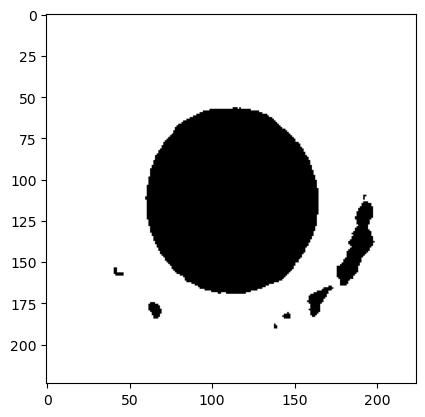

In [ ]:
plt.imshow(sel.get_support().reshape(224,224), cmap=('gray_r'))
plt.title('Features selection')
#pixels noirs = ce qui est gardé

Sauvegarde des données réduites dans un fichier .csv

In [ ]:
index_train=(list(y_train.index))
X_train_red=pd.DataFrame(X_train_red,index=index_train)
df_train=pd.concat([X_train_red,y_train],axis=1)
print(df_train.head())
index_test=(list(y_test.index))
X_test_red=pd.DataFrame(X_test_red,index=index_test)
df_test=pd.concat([X_test_red,y_test],axis=1)

df_red=pd.concat([df_train,df_test],axis=0)
print(df_red.tail())
df_red=df_red.sort_values(by='code')
print(df_red.head())

df_red=df_red.reset_index()
print(df_red.tail())

df_red['code']=df_red['code'].replace([1,2,3,4,5,6,7,8],['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'])
print(df_red.head())

df_red.to_csv('images_SelectPercentile20.csv')

        0    1    2    3    4    5    6    7    8    9  ...  10026  10027  \
3205  174  173  173  174  167  166  168  171  169  168  ...    233    233   
2058  175  176  177  179  188  193  202  212  225  233  ...    224    224   
1509  234  235  235  235  232  233  233  233  233  233  ...    202    202   
1837  172  175  177  185  172  174  172  173  173  170  ...    232    230   
2618  234  234  234  234  233  233  234  234  235  235  ...    170    168   

      10028  10029  10030  10031  10032  10033  10034  code  
3205    233    233    231    232    233    232    233     7  
2058    225    226    225    225    226    225    226     8  
1509    201    199    210    210    209    209    209     3  
1837    229    229    232    231    232    231    232     8  
2618    169    171    185    184    180    183    179     3  

[5 rows x 10036 columns]
        0    1    2    3    4    5    6    7    8    9  ...  10026  10027  \
1188  171  172  171  170  174  172  171  172  171  169  ...   

## Création df avec PCA 0.7

In [ ]:
pca70 = PCA(n_components = 0.7)
pca70.fit(X_train_red)

In [ ]:
X_train_pca70 = pca70.transform(X_train_red)
X_test_pca70 = pca70.transform(X_test_red)
print(pca70.n_components_)

In [ ]:
X_train_pca70 = pd.DataFrame(X_train_pca70)
X_test_pca70 = pd.DataFrame(X_test_pca70)
df_data = pd.concat([X_train_pca70, X_test_pca70], ignore_index=True)

In [ ]:
df_target = pd.concat([y_train, y_test],ignore_index=True)

In [ ]:
df70 = pd.concat([df_data, df_target], axis=1, ignore_index=True)
df70 = df70.rename(columns={'22' : 'code'})
df70.head()

In [ ]:
df70.to_csv('images_pca_70.csv')

## Création df avec PCA 0.8 

In [ ]:
pca80 = PCA(n_components = 0.8)
pca80.fit(X_train_red)

In [ ]:
X_train_pca = pca80.transform(X_train_red)
X_test_pca = pca80.transform(X_test_red)
print(pca80.n_components_)

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
df_data = pd.concat([X_train_pca, X_test_pca], ignore_index=True)

In [ ]:
df_target = pd.concat([y_train, y_test],ignore_index=True)

In [ ]:
df80 = pd.concat([df_data, df_target], axis=1, ignore_index=True)
df80= df80.rename(columns={'60' : 'code'})
df80.head()

In [ ]:
df80.to_csv('images_pca_80.csv')

## Création df avec PCA 0.9

In [ ]:
pca90= PCA(n_components = 0.9)
pca90.fit(X_train_red)

In [ ]:
X_train_pca90 = pca90.transform(X_train_red)
X_test_pca90 = pca90.transform(X_test_red)
print(pca90.n_components_)

In [ ]:
X_train_pca90 = pd.DataFrame(X_train_pca90)
X_test_pca90 = pd.DataFrame(X_test_pca90)
df_data = pd.concat([X_train_pca90, X_test_pca90], ignore_index=True)

In [ ]:
df_target = pd.concat([y_train, y_test],ignore_index=True)

In [ ]:
df90 = pd.concat([df_data, df_target], axis=1, ignore_index=True)
df90 = df90.rename(columns={'236':'code'})
df90.head()

In [ ]:
df90.to_csv('images_pca_90.csv')

# Création DataFrame avec les données du dataset Test

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/Basophil"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                  #  print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_bas = pd.DataFrame(data.reshape(data.shape[0], -1))

df_bas['code']='BA'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/Eosinophil"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                   # print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_eo = pd.DataFrame(data.reshape(data.shape[0], -1))

df_eo['code']='EO'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/Erythroblast"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_ery = pd.DataFrame(data.reshape(data.shape[0], -1))

df_ery['code']='ER'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/ig"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_ig = pd.DataFrame(data.reshape(data.shape[0], -1))

df_ig['code']='IG'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/Lymphocyte"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_lym = pd.DataFrame(data.reshape(data.shape[0], -1))

df_lym['code'] ='LYM'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/Monocyte"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                   # print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_mon = pd.DataFrame(data.reshape(data.shape[0], -1))

df_mon['code']='MON'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/Neutrophil"
max_images = 50
depth = 3

images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                    #print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_neu = pd.DataFrame(data.reshape(data.shape[0], -1))

df_neu['code']='SNE'

In [ ]:
root_folder = "/content/drive/MyDrive/Kaggle/Tests/TestA/platelet"
max_images = 50
depth = 3



images = []
image_count = 0
exclude_folders = []
for root, dirs, files in os.walk(root_folder):
    if image_count >= max_images:
        break
    if root_folder == root:
        dirs[:] = [d for d in dirs if d not in exclude_folders]
    else:
        current_depth = root[len(root_folder)+1:].count(os.sep)
        if current_depth > depth:
            continue
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert("L") # convert to Gray mode
                    img = img.resize((224,224)) # resize the image to (224, 224)
                    image = np.asarray(img) # convert PIL Image object to numpy array
                    images.append(image)
                    image_count += 1
                   # print(f"Processed image {image_count}: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Stack the images into a single 4D numpy array
data = np.stack(images)

# Flatten the 4D array into a 2D dataframe
df_pla = pd.DataFrame(data.reshape(data.shape[0], -1))

df_pla['code']='PLA'

In [ ]:
df_test= pd.concat([df_bas, df_eo, df_ery, df_neu, df_mon, df_lym, df_pla, df_ig])

## Séparation des données en entraînement et test

In [ ]:
data = df_test.drop('code', axis =1)
target = df_test['code']
target = target.replace(['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'], [1,2,3,4,5,6,7,8])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state = 42)

## Features selection

In [ ]:
sel = SelectPercentile(percentile =20)
sel.fit(X_train, y_train)

SelectPercentile(percentile=20)

In [ ]:
X_train_red = sel.transform(X_train)
X_test_red = sel.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_train_red.shape)

(3045, 50176)
(3045, 10035)


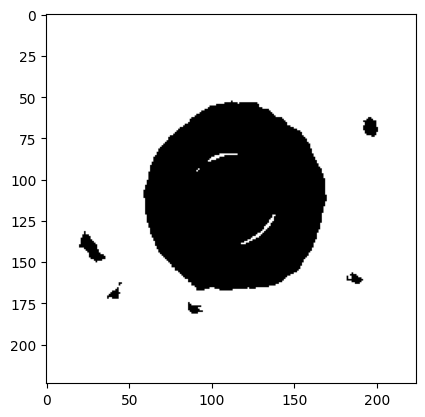

In [ ]:
plt.imshow(sel.get_support().reshape(224,224), cmap=('gray_r'))
plt.title('Features selection')
#pixels noirs = ce qui est gardé

In [ ]:
index_train=(list(y_train.index))
X_train_red=pd.DataFrame(X_train_red,index=index_train)
df_train=pd.concat([X_train_red,y_train],axis=1)
print(df_train.head())
index_test=(list(y_test.index))
X_test_red=pd.DataFrame(X_test_red,index=index_test)
df_test=pd.concat([X_test_red,y_test],axis=1)

df_red=pd.concat([df_train,df_test],axis=0)
print(df_red.tail())
df_red=df_red.sort_values(by='code')
print(df_red.head())

df_red=df_red.reset_index()
print(df_red.tail())

df_red['code']=df_red['code'].replace([1,2,3,4,5,6,7,8],['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'])
print(df_red.head())

df_red.to_csv('TestData_images_SelectPercentile20.csv')

### Création Df70_test avec PCA = 0.7

In [ ]:
pca70 = PCA(n_components = 22)
pca70.fit(X_train_red)

PCA(n_components=0.7)

In [ ]:
X_train_pca70 = pca70.transform(X_train_red)
X_test_pca70 = pca70.transform(X_test_red)
print(pca70.n_components_)

22


In [ ]:
X_train_pca70 = pd.DataFrame(X_train_pca70)
X_test_pca70 = pd.DataFrame(X_test_pca70)
df_data = pd.concat([X_train_pca70, X_test_pca70], ignore_index=True)

In [ ]:
df_target = pd.concat([y_train, y_test],ignore_index=True)
df_target = df_target.replace([1,2,3,4,5,6,7,8],['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'])

In [ ]:
df70 = pd.concat([df_data, df_target], axis=1, ignore_index=True)
df70 = df70.rename(columns={22 : 'code'})
df70.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,code
0,834.550249,-2199.384345,1493.087488,1961.079699,350.738227,-1648.922642,-2.676053,-947.758129,-394.684625,-282.044269,...,446.045607,303.622075,94.371201,-1563.974741,-467.129078,221.732296,565.426322,812.761775,117.891121,SNE
1,1921.139307,1442.742238,165.532297,-1119.394843,237.142309,-295.089743,25.256359,492.458883,-114.057772,879.552922,...,-415.678550,-418.839231,-455.465237,-743.698678,-154.954778,-4.074380,-105.272360,22.692664,-598.144975,SNE
2,-1639.082064,-409.968420,545.270441,-1056.808945,-1502.698237,99.975551,293.373006,509.699263,520.984439,136.441840,...,-391.584224,49.764984,-692.656927,168.890915,515.921311,101.366277,387.588398,-258.682741,203.662982,SNE
3,-1382.756290,-2629.058383,624.622229,-683.585122,21.475482,974.746029,-572.875548,230.667474,363.306185,-272.215929,...,786.904000,526.371641,-189.200740,-364.206648,1430.694309,-325.325012,-881.196686,284.303225,732.522770,SNE
4,815.335254,165.559993,36.074895,2352.342427,-173.406124,-268.173246,-878.203966,-277.183406,560.788103,-199.586669,...,-250.496298,-173.736004,-2.491564,225.089717,-224.373117,330.648694,-33.243663,652.197182,-214.975976,LYM


In [ ]:
df70.to_csv('/content/drive/MyDrive/Kaggle/imagesTest_pca70.csv')

### Création Df80_test avec PCA = 0.8

In [ ]:
pca80 = PCA(n_components = 60)
pca80.fit(X_train_red)

PCA(n_components=60)

In [ ]:
X_train_pca80 = pca80.transform(X_train_red)
X_test_pca80 = pca80.transform(X_test_red)
print(pca80.n_components_)

60


In [ ]:
X_train_pca80 = pd.DataFrame(X_train_pca80)
X_test_pca80 = pd.DataFrame(X_test_pca80)
df_data = pd.concat([X_train_pca80, X_test_pca80], ignore_index=True)

In [ ]:
df_target = pd.concat([y_train, y_test],ignore_index=True)
df_target = df_target.replace([1,2,3,4,5,6,7,8],['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'])

In [ ]:
df80 = pd.concat([df_data, df_target], axis=1, ignore_index=True)
df80 = df80.rename(columns={60 : 'code'})
df80.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,code
0,834.550249,-2199.384345,1493.087488,1961.079699,350.738227,-1648.922642,-2.676053,-947.758129,-394.684625,-282.044269,...,-31.457340,-26.253340,33.697681,-207.540633,9.710266,191.134540,-57.473349,-153.579955,107.817184,SNE
1,1921.139307,1442.742238,165.532297,-1119.394843,237.142309,-295.089743,25.256359,492.458884,-114.057772,879.552922,...,-26.426682,-45.801191,29.165883,-74.899389,-159.980848,270.467316,-93.429551,78.329609,-206.277749,SNE
2,-1639.082064,-409.968420,545.270441,-1056.808945,-1502.698237,99.975551,293.373006,509.699263,520.984439,136.441840,...,291.396951,-8.812754,53.400959,-93.427954,50.190878,258.144325,-71.920882,111.802126,-97.651135,SNE
3,-1382.756290,-2629.058383,624.622229,-683.585122,21.475482,974.746029,-572.875548,230.667474,363.306185,-272.215929,...,-69.123631,281.475144,-383.915820,441.607521,43.831492,500.923157,162.214728,-183.592184,-51.179727,SNE
4,815.335254,165.559993,36.074895,2352.342427,-173.406124,-268.173246,-878.203966,-277.183406,560.788103,-199.586669,...,-205.903115,364.114764,-88.505476,130.420596,-110.790221,-279.165616,69.945942,128.733129,233.457121,LYM


In [ ]:
df80.to_csv('/content/drive/MyDrive/Kaggle/imagesTest_pca80.csv')

### Création Df90_test avec PCA = 0.9

In [ ]:
pca90 = PCA(n_components = 236)
pca90.fit(X_train_red)

PCA(n_components=236)

In [ ]:
X_train_pca90 = pca90.transform(X_train_red)
X_test_pca90 = pca90.transform(X_test_red)

In [ ]:
X_train_pca90 = pd.DataFrame(X_train_pca90)
X_test_pca90 = pd.DataFrame(X_test_pca90)
df_data = pd.concat([X_train_pca90, X_test_pca90], ignore_index=True)

In [ ]:
df_target = pd.concat([y_train, y_test],ignore_index=True)
df_target = df_target.replace([1,2,3,4,5,6,7,8],['BA', 'ER', 'EO', 'IG', 'LYM','MON', 'SNE', 'PLA'])

In [ ]:
df90 = pd.concat([df_data, df_target], axis=1, ignore_index=True)
df90 = df90.rename(columns={236 : 'code'})
df90.head()

,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,code
0,834.550249,-2199.384345,1493.087488,1961.079699,350.738227,-1648.922642,-2.676053,-947.758129,-394.684625,-282.044269,...,2.760490,-10.233925,90.509200,-8.900564,-15.963565,67.482546,-6.553048,8.974076,11.300773,SNE
1,1921.139307,1442.742238,165.532297,-1119.394843,237.142309,-295.089743,25.256359,492.458883,-114.057772,879.552922,...,-21.957625,46.117215,20.699019,53.180190,-9.170592,-49.382509,-17.270938,-10.079157,1.819264,SNE
2,-1639.082064,-409.968420,545.270441,-1056.808945,-1502.698237,99.975551,293.373006,509.699263,520.984439,136.441840,...,38.530221,-70.479543,16.838312,43.018782,-72.214780,-14.658787,-35.359651,34.343300,-22.134341,SNE
3,-1382.756290,-2629.058383,624.622229,-683.585122,21.475482,974.746029,-572.875548,230.667474,363.306185,-272.215929,...,-91.442074,-28.650909,-23.221444,42.771874,99.242955,55.130240,-61.132118,46.672856,43.525894,SNE
4,815.335254,165.559993,36.074895,2352.342427,-173.406124,-268.173246,-878.203966,-277.183406,560.788103,-199.586669,...,-62.838662,16.923937,37.172536,21.901307,-79.074466,-30.469472,22.161166,86.720535,41.815160,LYM


In [ ]:
df90.to_csv('/content/drive/MyDrive/Kaggle/imagesTest_pca90.csv')